## MUSIC GENRE CLASSIFICATION

### import libraries

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tempfile import TemporaryFile

import sklearn.preprocessing as skp

import librosa, IPython
import librosa.display as lplt


In [2]:
import warnings 
warnings.filterwarnings(action= 'ignore')

### import data set

In [3]:
df = pd.read_csv('C:/Users/hp/Data/features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


### shape and samples of data set

In [4]:
print("Dataset has",df.shape)
# print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (1000, 60)


,index,label
0,disco,100
1,blues,100
2,rock,100
3,reggae,100
4,classical,100
5,hiphop,100
6,country,100
7,metal,100
8,jazz,100
9,pop,100



### Data Visualization

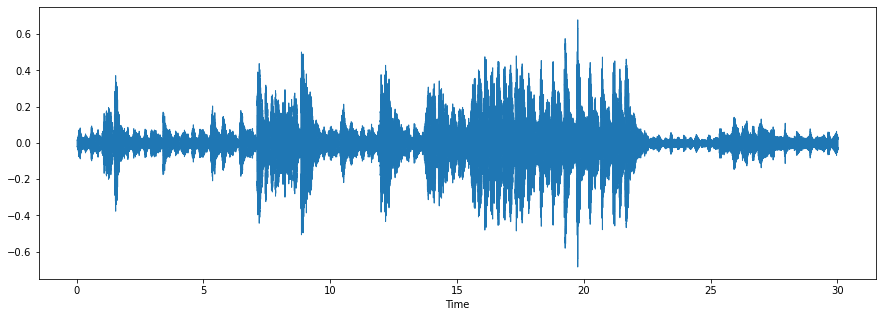

In [5]:
# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/jazz/jazz.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()
# play sample file
IPython.display.Audio(audio_data, rate=sr)

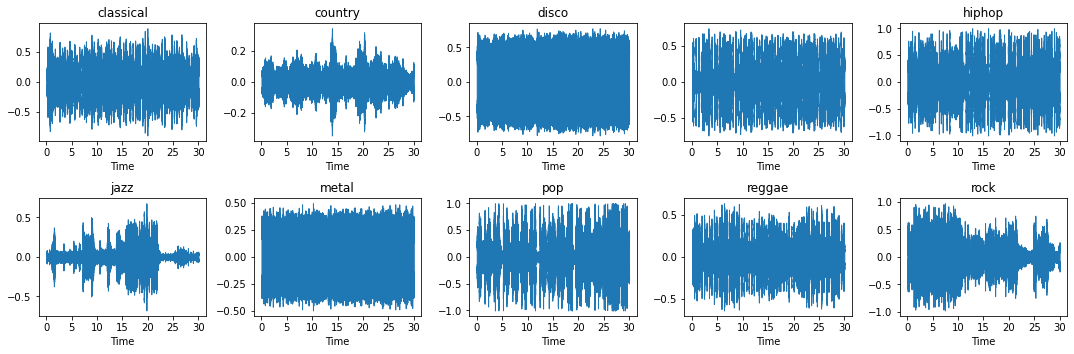

In [6]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(251)
# ax2 = f.add_subplot(122)
# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
plt.title("blues") 
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/classical/classical.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.title("classical")
plt.subplot(2,5,2)
lplt.waveshow(audio_data)

# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/country/country.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.title("country")
plt.subplot(2,5,3)
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/disco/disco.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.title("disco")
plt.subplot(2,5,4)
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/hiphop/hiphop.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,5)
plt.title("hiphop")
lplt.waveshow(audio_data)

# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/jazz/jazz.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,6)
plt.title("jazz")
lplt.waveshow(audio_data)

# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/metal/metal.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,7)
plt.title("metal")
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/pop/pop.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,8)
plt.title("pop")
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/reggae/reggae.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,9)
plt.title("reggae")
lplt.waveshow(audio_data)


# playing jazz wav file 
audio_fp = 'C:/Users/hp/Data/genres_original/rock/rock.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
# plt.figure(figsize=(15,5))
plt.subplot(2,5,10)
plt.title("rock")
lplt.waveshow(audio_data)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()
# play sample file
# IPython.display.Audio(audio_data, rate=sr)

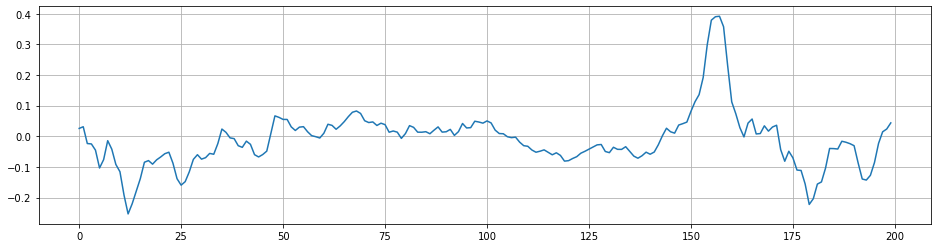

In [7]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.grid()
plt.show()

### BOX PLOT

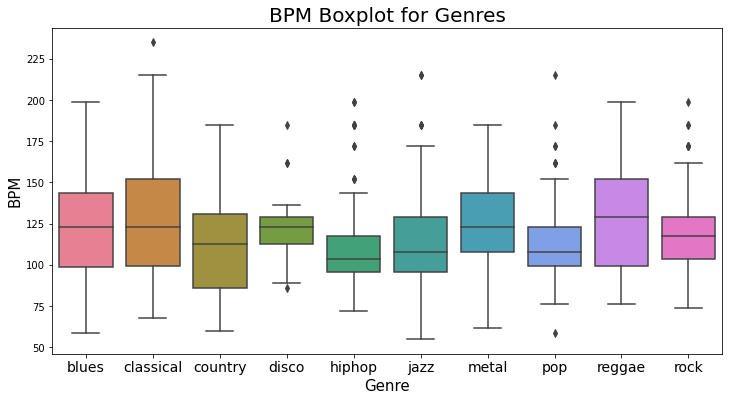

In [8]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(12,6));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.show()

### principal component analysis 

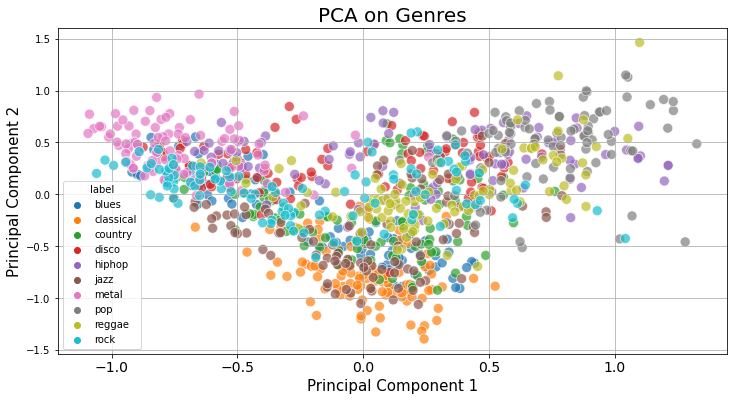

In [9]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (12, 6))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.grid()
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()

### splitting data set

In [10]:
#  if random_state = Integer : Will produce the same results across different calls
seed = 1
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [11]:
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.20, random_state = 0)


In [12]:
X_train.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [13]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 800 records out of 1000 which is 80%
Test set has 200 records out of 1000 which is 20%


### feature scaling

In [14]:
# Standardize features by removing the mean and scaling to unit variance.

scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

### Encoding labels

In [15]:
# map labels to index
label_index = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
print(label_index)

yt = []
for i in range(len(y_test.values)):
    yt.append(label_index[y_test.values[i]])
    
print(yt)
yt = np.array(yt)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
[7, 7, 3, 6, 8, 9, 6, 2, 9, 1, 0, 4, 8, 0, 2, 4, 1, 2, 9, 8, 7, 5, 7, 0, 8, 2, 5, 1, 7, 8, 0, 5, 1, 2, 2, 6, 8, 0, 4, 4, 0, 0, 6, 2, 1, 4, 6, 1, 2, 5, 5, 4, 1, 9, 7, 2, 8, 4, 9, 8, 5, 8, 9, 9, 2, 8, 7, 5, 2, 7, 4, 3, 6, 4, 2, 1, 6, 4, 3, 4, 8, 7, 3, 2, 2, 6, 3, 1, 6, 9, 6, 2, 0, 3, 9, 4, 1, 2, 1, 5, 3, 1, 8, 6, 0, 9, 5, 8, 3, 8, 5, 4, 4, 1, 6, 0, 3, 6, 2, 5, 6, 5, 0, 4, 3, 6, 1, 2, 9, 8, 3, 0, 1, 6, 6, 4, 8, 3, 4, 9, 0, 3, 0, 5, 6, 9, 9, 1, 1, 4, 0, 9, 7, 2, 9, 9, 7, 2, 5, 7, 4, 5, 2, 9, 8, 7, 9, 0, 1, 7, 6, 1, 5, 9, 3, 5, 6, 4, 6, 1, 9, 0, 0, 7, 1, 1, 9, 8, 4, 5, 6, 4, 9, 9, 5, 1, 6, 3, 6, 3]


### MODEL BUILDING

### 1. KNN CLASSIFIER

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

recall = []
precision = []
accuracy = []
f1 = []

def performance_of_classifier(classifier,clf,X_test,y_test,y_pred):
    print("---------------PERFORMANCE ANALYSIS FOR {} CLASSIFIER----------------\n".format(clf))

    print("Real Test dataset labels: \n{}\n".format(y_test))
    print("Predicted Test dataset labels: \n{}\n".format(y_pred))

    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)  
    plt.show()




Max Accuracy is 0.675 on test dataset with 4 neighbors.



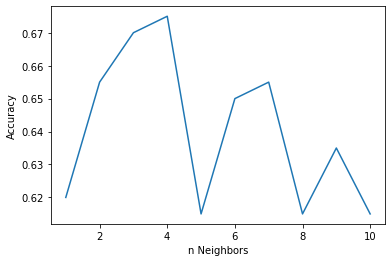

In [17]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier

results_knn=[]
for i in range(1,11):
    Knn = KNeighborsClassifier(n_neighbors=i+1)
    Knn.fit(X_train,y_train)
    results_knn.append(Knn.score(X_test,y_test))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("\nMax Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(np.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")
plt.show()

---------------PERFORMANCE ANALYSIS FOR KNN CLASSIFIER----------------

Real Test dataset labels: 
993          pop
859          pop
298        disco
553        metal
672       reggae
         ...    
679    classical
722        metal
215        disco
653        metal
150        disco
Name: label, Length: 200, dtype: object

Predicted Test dataset labels: 
['pop' 'pop' 'classical' 'disco' 'reggae' 'rock' 'metal' 'country' 'rock'
 'classical' 'country' 'hiphop' 'reggae' 'blues' 'country' 'reggae' 'jazz'
 'country' 'disco' 'reggae' 'pop' 'jazz' 'reggae' 'blues' 'hiphop'
 'country' 'jazz' 'country' 'pop' 'reggae' 'jazz' 'classical' 'classical'
 'country' 'disco' 'rock' 'disco' 'blues' 'hiphop' 'pop' 'rock' 'blues'
 'rock' 'classical' 'classical' 'hiphop' 'metal' 'classical' 'country'
 'jazz' 'classical' 'hiphop' 'classical' 'disco' 'pop' 'country' 'reggae'
 'hiphop' 'rock' 'reggae' 'jazz' 'country' 'disco' 'rock' 'blues' 'reggae'
 'pop' 'jazz' 'country' 'country' 'reggae' 'disco' 'disco' 

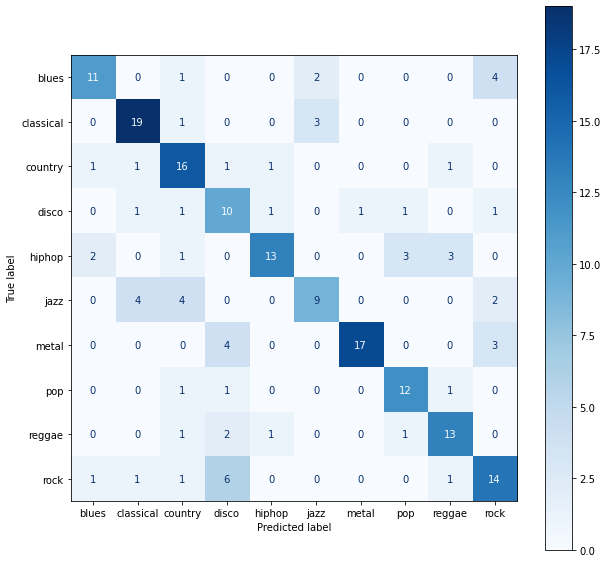


		THE ACCURACY OF KNN CLASSIFIER IS: 67.0%


In [18]:
Knn=KNeighborsClassifier(n_neighbors=best_k)
# y_score = Knn.fit(X_train,y_train)
Knn.fit(X_train,y_train)
# Predicting the Test set results
y_pred = Knn.predict(X_test)

# Making the Confusion Matrix

performance_of_classifier(Knn,"KNN",X_test,y_test,y_pred)

acc1 = metrics.accuracy_score(y_test, y_pred)
print("\n\t\tTHE ACCURACY OF KNN CLASSIFIER IS: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))



In [19]:
y_prob_pred = Knn.predict_proba(X_test)
score1 = metrics.roc_auc_score(y_test, y_prob_pred, multi_class='ovo',average='weighted')

recall.append(metrics.recall_score(y_test, y_pred, average='weighted'))
f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))
precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))

print(score1)

0.9220038979131514


### 2. SVM CLASSIFIER 

---------------PERFORMANCE ANALYSIS FOR SVM CLASSIFIER----------------

Real Test dataset labels: 
993          pop
859          pop
298        disco
553        metal
672       reggae
         ...    
679    classical
722        metal
215        disco
653        metal
150        disco
Name: label, Length: 200, dtype: object

Predicted Test dataset labels: 
['pop' 'pop' 'classical' 'disco' 'reggae' 'metal' 'metal' 'country' 'rock'
 'classical' 'country' 'hiphop' 'reggae' 'blues' 'country' 'reggae'
 'classical' 'country' 'disco' 'reggae' 'pop' 'jazz' 'hiphop' 'blues'
 'reggae' 'country' 'jazz' 'country' 'pop' 'reggae' 'jazz' 'classical'
 'classical' 'country' 'disco' 'disco' 'reggae' 'blues' 'hiphop' 'hiphop'
 'blues' 'blues' 'disco' 'classical' 'classical' 'hiphop' 'metal'
 'classical' 'country' 'jazz' 'jazz' 'reggae' 'classical' 'metal' 'pop'
 'country' 'reggae' 'hiphop' 'disco' 'reggae' 'jazz' 'jazz' 'country'
 'disco' 'blues' 'reggae' 'pop' 'jazz' 'country' 'rock' 'hiphop' 'disco'
 '

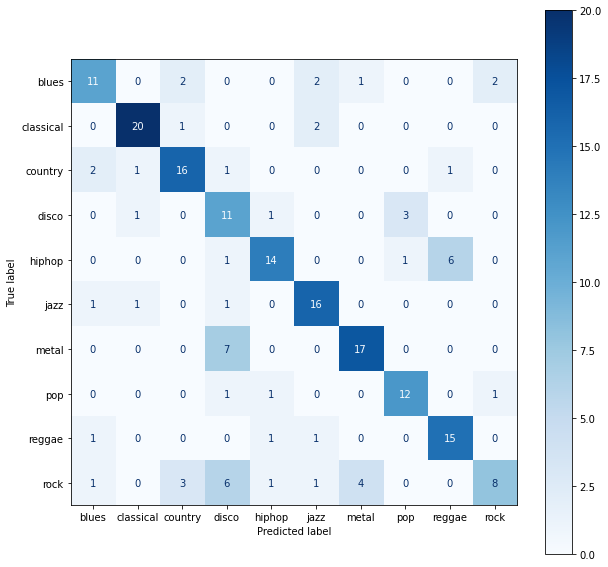


		THE ACCURACY OF SVM CLASSIFIER IS: 70.0%


In [20]:
#Import svm model
# from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC(decision_function_shape='ovo',probability = True) # Linear Kernel
# svm = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm.predict(X_test)

performance_of_classifier(svm,"SVM",X_test,y_test,y_pred)

acc2 = metrics.accuracy_score(y_test, y_pred)
print("\n\t\tTHE ACCURACY OF SVM CLASSIFIER IS: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

In [21]:
y_prob_pred = svm.predict_proba(X_test)
score2 = metrics.roc_auc_score(y_test, y_prob_pred, multi_class='ovo',average='weighted')

recall.append(metrics.recall_score(y_test, y_pred, average='weighted'))
f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))
precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))

print(score2)

0.9628387586683732


### 3. DECISION TREE CLASSIFIER

---------------PERFORMANCE ANALYSIS FOR DECISION TREE CLASSIFIER----------------

Real Test dataset labels: 
993          pop
859          pop
298        disco
553        metal
672       reggae
         ...    
679    classical
722        metal
215        disco
653        metal
150        disco
Name: label, Length: 200, dtype: object

Predicted Test dataset labels: 
['pop' 'pop' 'blues' 'rock' 'reggae' 'blues' 'metal' 'country' 'reggae'
 'classical' 'blues' 'pop' 'hiphop' 'blues' 'blues' 'blues' 'classical'
 'reggae' 'blues' 'country' 'pop' 'classical' 'reggae' 'hiphop' 'hiphop'
 'country' 'jazz' 'country' 'pop' 'reggae' 'blues' 'classical' 'classical'
 'country' 'rock' 'metal' 'hiphop' 'blues' 'hiphop' 'pop' 'rock' 'blues'
 'disco' 'country' 'blues' 'hiphop' 'metal' 'classical' 'country' 'jazz'
 'jazz' 'reggae' 'classical' 'reggae' 'pop' 'jazz' 'reggae' 'disco' 'jazz'
 'reggae' 'jazz' 'jazz' 'disco' 'rock' 'blues' 'reggae' 'pop' 'jazz'
 'disco' 'jazz' 'hiphop' 'disco' 'rock' 'pop' 'ro

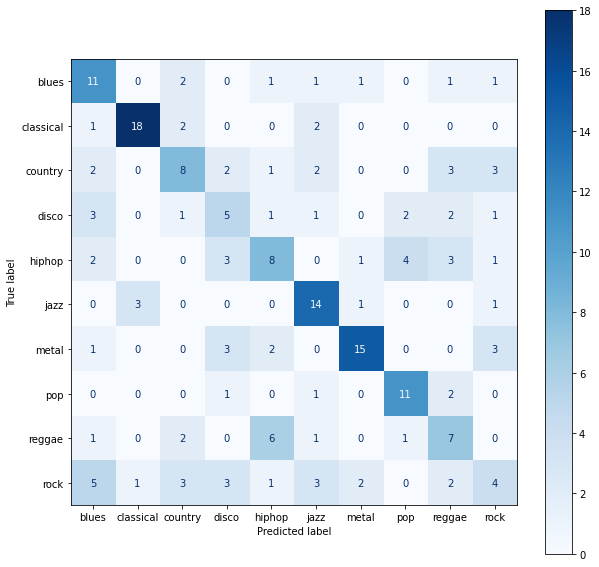


		THE ACCURACY OF DECISION TREE CLASSIFIER IS: 50.5%


In [22]:
#Import DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

#Create a dec Classifier
dect = DecisionTreeClassifier() 
dect.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dect.predict(X_test)

performance_of_classifier(dect,"DECISION TREE",X_test,y_test,y_pred)
# auc_roc(classifier,"DECISION TREE",X_test,y_test)
acc3 = metrics.accuracy_score(y_test, y_pred)
print("\n\t\tTHE ACCURACY OF DECISION TREE CLASSIFIER IS: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

In [23]:
y_prob_pred = dect.predict_proba(X_test)
score3 = metrics.roc_auc_score(y_test, y_prob_pred, multi_class='ovo',average='weighted')

recall.append(metrics.recall_score(y_test, y_pred, average='weighted'))
f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))
precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))

print(score3)

0.7265764046539456


### 4. NAIVE BAYES CLASSIFIER

---------------PERFORMANCE ANALYSIS FOR NAIVE BAYES CLASSIFIER----------------

Real Test dataset labels: 
993          pop
859          pop
298        disco
553        metal
672       reggae
         ...    
679    classical
722        metal
215        disco
653        metal
150        disco
Name: label, Length: 200, dtype: object

Predicted Test dataset labels: 
['pop' 'pop' 'classical' 'blues' 'reggae' 'metal' 'metal' 'country'
 'disco' 'classical' 'country' 'pop' 'hiphop' 'blues' 'country' 'country'
 'classical' 'disco' 'metal' 'reggae' 'pop' 'jazz' 'pop' 'blues' 'pop'
 'country' 'jazz' 'rock' 'pop' 'reggae' 'country' 'jazz' 'classical'
 'country' 'disco' 'blues' 'country' 'country' 'pop' 'pop' 'blues' 'metal'
 'disco' 'jazz' 'classical' 'blues' 'metal' 'classical' 'country' 'rock'
 'jazz' 'rock' 'classical' 'metal' 'pop' 'jazz' 'reggae' 'hiphop' 'metal'
 'country' 'jazz' 'blues' 'hiphop' 'disco' 'metal' 'reggae' 'pop' 'jazz'
 'country' 'rock' 'reggae' 'disco' 'disco' 'pop' 'countr

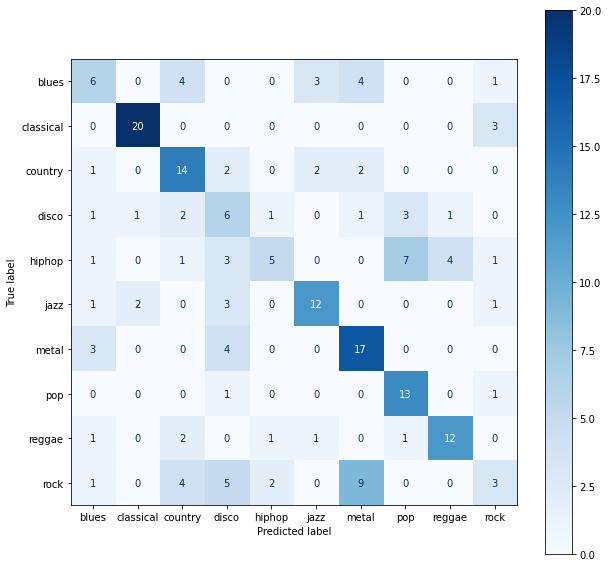


		THE ACCURACY OF DECISION TREE CLASSIFIER IS: 54.0%


In [24]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nbc = GaussianNB()

#Train the model using the training sets
nbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nbc.predict(X_test)
y_pred_prob = nbc.predict_proba(X_test)

performance_of_classifier(nbc,"NAIVE BAYES",X_test,y_test,y_pred)

metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')
acc4 = metrics.accuracy_score(y_test, y_pred)
print("\n\t\tTHE ACCURACY OF DECISION TREE CLASSIFIER IS: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

In [25]:
y_prob_pred = nbc.predict_proba(X_test)

score4 = metrics.roc_auc_score(y_test, y_prob_pred, multi_class='ovo',average='weighted')

recall.append(metrics.recall_score(y_test, y_pred, average='weighted'))
f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))
precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))

print(score4)

0.8991262918174149


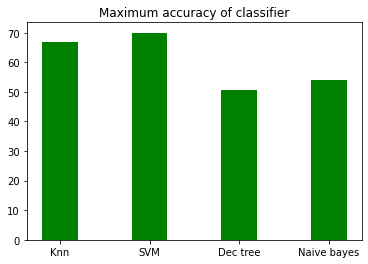

In [26]:
accuracy = []
classifier = []
accuracy.append(acc1*100)
classifier.append("Knn")
accuracy.append(acc2*100)
classifier.append("SVM")
accuracy.append(acc3*100)
classifier.append("Dec tree")
accuracy.append(acc4*100)
classifier.append("Naive bayes")

plt.bar(classifier ,accuracy,color ='green',width = 0.4)
plt.title("Maximum accuracy of classifier")
plt.show()

In [27]:
score = []
score.append(score1)
score.append(score2)
score.append(score3)
score.append(score4)


  
# Create the pandas DataFrame
df = pd.DataFrame(score, columns=['Auc Roc score'])
df.insert(0, "classifier", classifier, True)
df

,classifier,Auc Roc score
0,Knn,0.922004
1,SVM,0.962839
2,Dec tree,0.726576
3,Naive bayes,0.899126


In [28]:
# Create the pandas DataFrame
df = pd.DataFrame(classifier, columns=['Classifier'])
# df.insert(0, "classifier", classifier, True)
df['precision'] = precision
df['recall'] = recall
df['f1_score'] = f1
df['auc_roc_score'] = score
df['accuracy %'] = accuracy
df

,Classifier,precision,recall,f1_score,auc_roc_score,accuracy %
0,Knn,0.693894,0.670,0.672901,0.922004,67.0
1,SVM,0.721927,0.700,0.696638,0.962839,70.0
2,Dec tree,0.501183,0.505,0.496918,0.726576,50.5
3,Naive bayes,0.536861,0.540,0.519552,0.899126,54.0


### FEATURE EXTRACTION

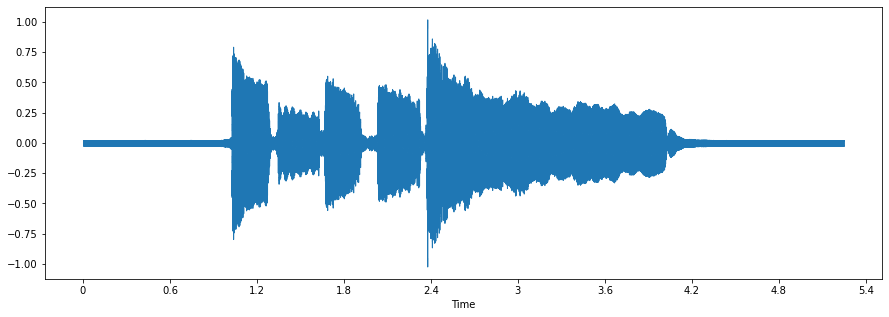

In [29]:
# playing jazz wav file 
audio_fp = (r"C:\Users\hp\Data\Test\test1.wav")
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()
# play sample file
IPython.display.Audio(audio_data, rate=sr)

In [30]:
    
x = librosa.feature.mfcc(y=audio_data, sr=sr)
mfcc = []
for i in range(len(x)):
    mfcc.append(np.mean(x[i]))
    mfcc.append(np.var(x[i]))


x = librosa.feature.chroma_stft(y=audio_data, sr=sr)
chroma = []
chroma.append(np.mean(x))
chroma.append(np.var(x))


x = librosa.feature.rms(y=audio_data)
rms = []
rms.append(np.mean(x))
rms.append(np.var(x))

x = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
spc = []
spc.append(np.mean(x))
spc.append(np.var(x))

x = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
spb = []
spb.append(np.mean(x))
spb.append(np.var(x))


x = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
rolloff= []
rolloff.append(np.mean(x))
rolloff.append(np.var(x))


x = librosa.feature.zero_crossing_rate(audio_data)
zero_crossing = []
zero_crossing.append(np.mean(x))
zero_crossing.append(np.var(x))


x = librosa.effects.percussive(audio_data)
precp = []
precp.append(np.mean(x))
precp.append(np.var(x))


x = librosa.effects.harmonic(audio_data)
har = []
har.append(np.mean(x))
har.append(np.var(x))


onset_env = librosa.onset.onset_strength(y=audio_data, sr=sr)
x = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = []
tempo.append(np.mean(x))


features = []
features = np.concatenate((chroma,rms,spb,spc,rolloff,zero_crossing,har,precp,tempo,mfcc))

#     return features
print(features)

[ 3.77096206e-01  1.57024145e-01  1.24917477e-01  9.87778232e-03
  1.00983224e+03  4.97230649e+04  5.62132668e+02  4.04541075e+04
  8.96189148e+02  5.63566469e+05  1.47409313e-02  1.58107076e-04
 -1.98125709e-02  2.24684495e-02 -1.83785000e-04  7.38605158e-04
  1.72265625e+02 -3.76490784e+02  1.41882930e+04  9.72859573e+01
  3.79546680e+03 -4.79049730e+00  6.37043701e+02  3.81951675e+01
  3.00211273e+02  1.84172764e+01  6.52175522e+01 -3.17482734e+00
  1.05411102e+02  9.97870350e+00  2.27931271e+01 -2.71666288e+00
  9.29877014e+01 -5.78058338e+00  7.27483292e+01 -4.05792713e+00
  8.05565567e+01 -9.91167259e+00  1.31386612e+02 -5.01864433e+00
  4.57371674e+01 -2.56962967e+00  4.14523392e+01 -6.28773689e+00
  6.46414337e+01 -6.92660379e+00  4.16227150e+01 -6.29485035e+00
  7.98465042e+01 -4.74176359e+00  6.51231842e+01 -4.71257830e+00
  3.28054390e+01 -6.22667313e+00  5.53733368e+01 -5.88312340e+00
  1.02293159e+02]


In [31]:
y_pred = dect.predict([features])
print("The predicted audio file using SVM Classifier is of genre : ",y_pred)

The predicted audio file using SVM Classifier is of genre :  ['disco']


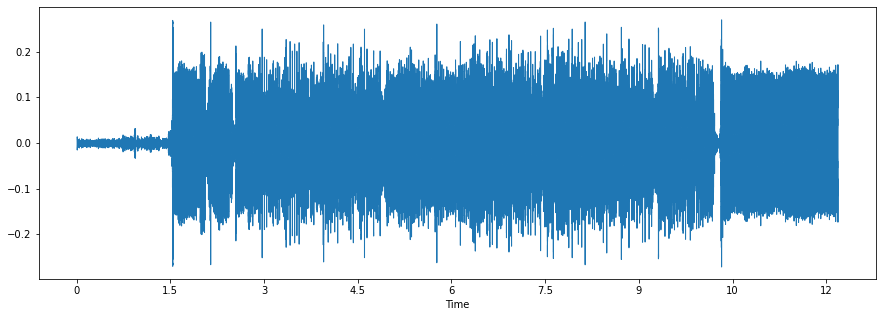

In [35]:
# playing jazz wav file 
audio_fp = (r"C:\Users\hp\Data\Test\test2.wav")
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()
# play sample file
IPython.display.Audio(audio_data, rate=sr)

In [36]:
    
x = librosa.feature.mfcc(y=audio_data, sr=sr)
mfcc = []
for i in range(len(x)):
    mfcc.append(np.mean(x[i]))
    mfcc.append(np.var(x[i]))


x = librosa.feature.chroma_stft(y=audio_data, sr=sr)
chroma = []
chroma.append(np.mean(x))
chroma.append(np.var(x))


x = librosa.feature.rms(y=audio_data)
rms = []
rms.append(np.mean(x))
rms.append(np.var(x))

x = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
spc = []
spc.append(np.mean(x))
spc.append(np.var(x))

x = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
spb = []
spb.append(np.mean(x))
spb.append(np.var(x))


x = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
rolloff= []
rolloff.append(np.mean(x))
rolloff.append(np.var(x))


x = librosa.feature.zero_crossing_rate(audio_data)
zero_crossing = []
zero_crossing.append(np.mean(x))
zero_crossing.append(np.var(x))


x = librosa.effects.percussive(audio_data)
precp = []
precp.append(np.mean(x))
precp.append(np.var(x))


x = librosa.effects.harmonic(audio_data)
har = []
har.append(np.mean(x))
har.append(np.var(x))


onset_env = librosa.onset.onset_strength(y=audio_data, sr=sr)
x = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = []
tempo.append(np.mean(x))


features = []
features = np.concatenate((chroma,rms,spb,spc,rolloff,zero_crossing,har,precp,tempo,mfcc))

#     return features
print(features)

[ 3.11893046e-01  9.20928344e-02  5.69955222e-02  4.39887925e-04
  1.60511765e+03  1.92746361e+05  1.01657604e+03  1.38789770e+05
  2.29921289e+03  1.81303060e+06  3.88216146e-02  2.05409289e-04
  6.39964856e-05  3.27147217e-03  2.44071431e-04  1.06360218e-04
  9.93840144e+01 -3.25809357e+02  4.53087793e+03  1.37729019e+02
  4.52354675e+02  2.01367168e+01  2.94086243e+02  7.13253250e+01
  5.78954895e+02 -3.04627132e+00  2.45365082e+02  7.16253185e+00
  1.02462502e+02  5.15298367e+00  7.12619629e+01 -4.70602512e+00
  1.35022675e+02 -3.45305610e+00  8.42528305e+01 -7.75722146e-01
  7.15486603e+01 -6.30329227e+00  8.36926651e+01 -6.36125803e+00
  7.66557465e+01 -3.78709602e+00  6.22082138e+01 -1.38657868e+00
  3.89513283e+01 -8.83019924e+00  5.90967026e+01 -8.17599201e+00
  5.18735199e+01 -9.18035316e+00  7.42055054e+01 -2.36299205e+00
  5.63656998e+01 -7.59162951e+00  9.22977142e+01  2.48004985e+00
  7.86745224e+01]


In [37]:
y_pred = svm.predict([features])
print("The predicted audio file using SVM is of genre : ",y_pred)

The predicted audio file using SVM is of genre :  ['jazz']
